# CMSE 201 Final Project Template

#### CMSE 201 Final Project
### &#9989; Araynah Dover
### &#9989; Section_005
#### &#9989; 12-02-24

# The Relationship Between Stellar Mass and Planetary Systems : Implications for Habitable Zones

## Background and Motivation

Through time, there have been questions about other planetary systems and how they relate to our very own solar system. As we discover more exoplanets orbiting distant stars, a fundamental question emerges: does a star's mass correlate to the number of planets in its gravitational grasp, and do these exoplanets closely relate to our solar system in ways that might support the potential for life?

This question is interesting because our Sun, a medium-mass star, hosts eight planets in relatively stable orbits, creating conditions that have allowed life to flourish on Earth. Understanding whether this is common among stars of similar mass, or if different stellar masses tend to support different numbers of planets, could provide crucial insights into the formation and evolution of planetary systems throughout the universe.

## Methodology

In this project, I analyzed data from the 'All Exoplanets Dataset' on Kaggle, which contains information about confirmed exoplanets and their host stars up until 2021. The dataset includes key variables necessary for investigating the relationship between stellar mass and planetary systems:
Planet and host star identification (Planet Name, Planet Host),
Stellar properties (Mass, Radius, Effective Temperature, Spectral Type), and Planetary system characteristics (Number of Planets, Orbital Semi-Major Axis).

There also was some data preprocessing thag involved creating a focused dataset by selecting relevant columns for addressing the research questions. Using Python's pandas library, I cleaned and organized the data into a new dataframe containing only the variables needed for future analysis.

In [38]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in file contents

exo = pd.read_csv('exo.csv')

# Created a new Data Frame for Just the needed Variables

# Used the drop_duplicates w/subset to combine those columns

drop_exo = exo.drop_duplicates(subset=['Planet Host', 'Stellar Mass','Stellar Radius'])

# Used loc to parse all needed rows with specific columns

df = drop_exo.loc[:, ['Planet Name', 'Planet Host', 'Num Planets', 'Stellar Mass',
                      'Stellar Radius','Stellar Effective Temperature',
                      'Orbit Semi-Major Axis','Spectral Type'
                     ]
                 ]
df.head()

,Planet Name,Planet Host,Num Planets,Stellar Mass,Stellar Radius,Stellar Effective Temperature,Orbit Semi-Major Axis,Spectral Type
0,11 Com b,11 Com,1,2.70,19.00,4742.0,1.29,G8 III
1,11 UMi b,11 UMi,1,2.78,29.79,4213.0,1.53,NaN
2,14 And b,14 And,1,2.20,11.00,4813.0,0.83,K0 III
3,14 Her b,14 Her,2,0.90,0.93,5338.0,2.93,NaN
4,16 Cyg B b,16 Cyg B,1,1.08,1.13,5750.0,1.66,NaN


I converted the absolute stellar mass values in kilograms to values relative to our Sun's mass. A new column was created  to store the converted values while preserving the original measurements. The original measuments represented how much bigger that stars mass was to our suns mass

In [6]:
# Compute the Stellar mass in expo form (kg)

mass_sun = 1.989 * pow(10,30)   # Mass of Sun (kg)

# Calucted the Relative Stellar Mass for each host star

df['Stellar Mass (kg)'] = (df['Stellar Mass'] * mass_sun)

df.head()

,Planet Name,Planet Host,Num Planets,Stellar Mass,Stellar Radius,Stellar Effective Temperature,Orbit Semi-Major Axis,Spectral Type,Stellar Mass (kg)
0,11 Com b,11 Com,1,2.70,19.00,4742.0,1.29,G8 III,5.370300e+30
1,11 UMi b,11 UMi,1,2.78,29.79,4213.0,1.53,NaN,5.529420e+30
2,14 And b,14 And,1,2.20,11.00,4813.0,0.83,K0 III,4.375800e+30
3,14 Her b,14 Her,2,0.90,0.93,5338.0,2.93,NaN,1.790100e+30
4,16 Cyg B b,16 Cyg B,1,1.08,1.13,5750.0,1.66,NaN,2.148120e+30


The following visualizations present the distribution of stellar masses in relation to the number of planets in each system. While representing the same dataset, each visualization offers a different perspective:
* A seaborn box plot showing the statistical distribution of stellar masses
* A scatter plot displaying individual data points
* A frequency chart illustrating the occurrence patterns

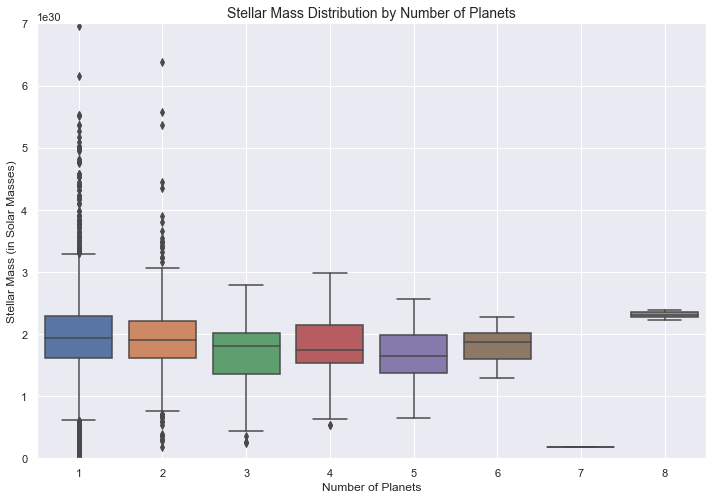

In [29]:
plt.figure(figsize=(12, 8))

# Used seabord boxplot

sns.boxplot(x='Num Planets', y='Stellar Mass (kg)', data=df)
plt.title('Stellar Mass Distribution by Number of Planets', fontsize=14)
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Stellar Mass (in Solar Masses)', fontsize=12)

# Show notation 

plt.ylim(0, 7e30)
plt.grid(True)
plt.show()

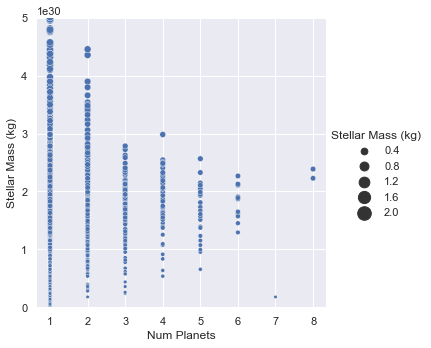

In [8]:
sns.set_theme(style="darkgrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df, x="Num Planets",y="Stellar Mass (kg)",
    size="Stellar Mass (kg)",
    palette=cmap, sizes=(10, 200),
)
plt.ylim(0, 5e30)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

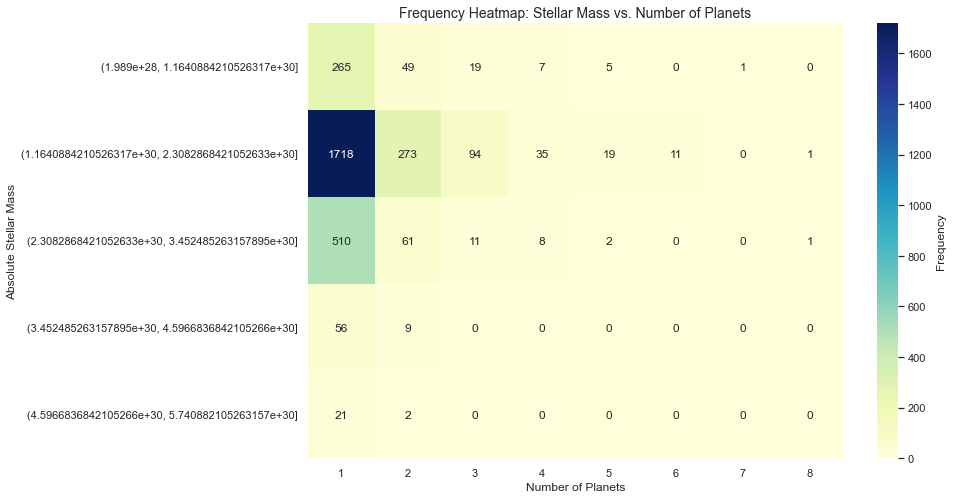

In [31]:
# Define bins for stellar mass

bins = np.linspace(df['Stellar Mass (kg)'].min(), df['Stellar Mass (kg)'].max(), 20)  # 20 bins

# Bin the stellar mass values into the defined bins

df['Stellar Mass Bins'] = pd.cut(df['Stellar Mass (kg)'], bins=bins)

# Create a contingency table between 'Stellar Mass Bins' and 'Num Planets'

heatmap_data = pd.crosstab(df['Stellar Mass Bins'], df['Num Planets'])

# Display the first 5 rows for easier visualization

heatmap_data = heatmap_data.iloc[:5]

# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.heatmap(
    heatmap_data,  # Data to plot
    cmap='YlGnBu', 
    annot=True,  
    fmt='d',  
    cbar_kws={'label': 'Frequency'}  # Label for the color bar
)

# Set the title and axis labels for the heatmap
plt.title('Frequency Heatmap: Stellar Mass vs. Number of Planets', fontsize=14)
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Absolute Stellar Mass', fontsize=12)

# Show the plot
plt.show()


## Results

### Results: Distribution Analysis
To see the relationship between stellar mass and the number of planets in orbit, a frequency heatmap was generated for best understating the relationship. The x-axis represents the number of planets in each host star system, and the y-axis represents binned values of stellar mass. The color intensity indicates the frequency of host star systems falling into each category.

The first column of the heatmap indicates that the majority of host star systems have only one planet in orbit, irrespective of stellar mass. These single-planet systems are mostly concentrated in stars with stellar masses closest to the Sun's mass or just under the suns mass binned at 1.64-2.30 M⊙. As well as these host star exhibt the highest diversity in terms of planet count in row two as well as row 1

It is also seen that for stars with higher stellar masse there is a decrese in the number of host star systems

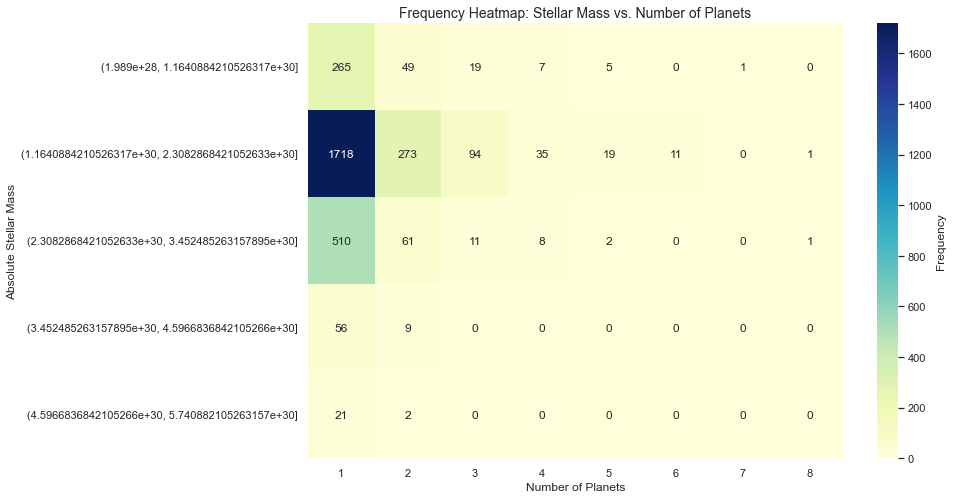

In [33]:
# Define bins for stellar mass

bins = np.linspace(df['Stellar Mass (kg)'].min(), df['Stellar Mass (kg)'].max(), 20)  # 20 bins

# Bin the stellar mass values into the defined bins

df['Stellar Mass Bins'] = pd.cut(df['Stellar Mass (kg)'], bins=bins)

# Create a contingency table between 'Stellar Mass Bins' and 'Num Planets'

heatmap_data = pd.crosstab(df['Stellar Mass Bins'], df['Num Planets'])

# Display the first 5 rows for easier visualization

heatmap_data = heatmap_data.iloc[:5]

# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
sns.heatmap(
    heatmap_data,  # Data to plot
    cmap='YlGnBu', 
    annot=True,  
    fmt='d',  
    cbar_kws={'label': 'Frequency'}  # Label for the color bar
)

# Set the title and axis labels for the heatmap
plt.title('Frequency Heatmap: Stellar Mass vs. Number of Planets', fontsize=14)
plt.xlabel('Number of Planets', fontsize=12)
plt.ylabel('Absolute Stellar Mass', fontsize=12)

# Show the plot
plt.show()


### Results: Habitable Zone Analysis
In order to answer the second question above "Do these exoplanets closely relate to our solar system in ways that might support the potential for life?" A few cicumtamice would have to be met and 1 of those being habital zones in each hosest systmes

The habitable zone is the region around a star where conditions might allow for the existence of liquid water on a planet's surface which is a key component to determine if a planet is sustainable for life. This zone varies depending on the star's properties, particularly its luminosity and temperature.

To determine the habitable zone boundaries, I used several key equations that consider stellar properties:

- Stellar Luminosity (L) = (R/R☉)² × (T/5778)⁴, where R is stellar radius and T is effective temperature
- Inner Habitable Zone Boundary = 0.95 × √L (in astronomical units)
- Outer Habitable Zone Boundary = 1.37 × √L (in astronomical units)

The correlation between stellar mass and number of planets becomes particularly relevant when considering habitable zones because a star's mass directly influences its luminosity and temperature, which in turn determine the extent and location of its habitable zone. More massive stars generally have wider habitable zones, but these zones may be less stable being that the larger a star is the shorter the life span

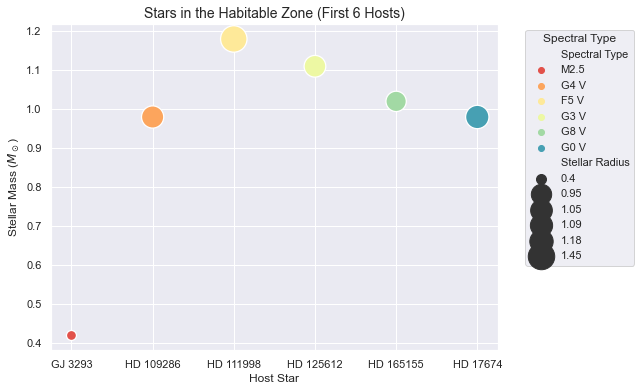

In [41]:
# Calculate habitable zone boundaries 

df['Luminosity'] = (df['Stellar Radius']**2) * (df['Stellar Effective Temperature']/5778)**4  
df['Habitable Zone Inner'] = 0.95 * (df['Luminosity']**0.5)
df['Habitable Zone Outer'] = 1.37 * (df['Luminosity']**0.5)

# Check if planets are in the habitable zone

df['In Habitable Zone'] = (df['Orbit Semi-Major Axis'] >= df['Habitable Zone Inner']) & (df['Orbit Semi-Major Axis'] <= df['Habitable Zone Outer']
)
                                                        

# Visualize habitable zone planets by spectral type

habitable_planets = df[df['In Habitable Zone']]

# Drop Na rows in Spectral Type
habitable_planets = habitable_planets.dropna(subset=['Spectral Type'])

# Display the first 6 habital hostess

first_six_hosts = habitable_planets.head(6)

# Create the scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=first_six_hosts,
    x="Planet Host", 
    y="Stellar Mass",  
    size="Stellar Radius",  
    hue="Spectral Type", 
    palette="Spectral", 
    sizes=(100, 700),  
    legend="full"
)

# labels and title

plt.title("Stars in the Habitable Zone (First 6 Hosts)", fontsize=14)
plt.xlabel("Host Star", fontsize=12)
plt.ylabel("Stellar Mass ($M_\odot$)", fontsize=12)
plt.legend(title="Spectral Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Discussion and Conclusion

Based on the distribution visualizations (scatter plot, frequency chart, and box plot), the median values of host star masses fall within the range of 1.164-2.30 solar masses for systems containing 1-6 planets. The data reveals a significant relationship: stars with masses similar to our Sun (M☉) are more likely to host multiple-planet systems, while stars with substantially higher or lower masses typically host single-planet systems.

Analysis of the habitable zone model shows that two planets in our dataset closely resemble our solar system's potential for habitability. These planets orbit stars with stellar masses and spectral types similar to our Sun's G2V classification, and their presence within their stars' habitable zones suggests potential conditions for life.

Obstacles:
Selecting the most effective and interpretable distribution visualizations led to using three complementary approaches rather than a single representation
Implementing the habitable zone calculations and frequency chart coding required complex mathematical and programming solutions

### References

GeeksforGeeks. (n.d.). Box plot in Python using Seaborn and Matplotlib. Retrieved from https://www.geeksforgeeks.org/box-plot/

Kaggle. (2021). All Exoplanets Dataset. Retrieved from https://www.kaggle.com/datasets/shivamb/all-exoplanets-dataset

Seaborn. (n.d.). Spreadsheet heatmap. Retrieved from https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

GeeksforGeeks. (n.d.). Seaborn Heatmap – A Comprehensive Guide. Retrieved from https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

OpenAI. ChatGPT model (GPT-4). 2024. Response to a question about calculating the habitable zone. OpenAI, https://openai.com.

Planetary Biology. (n.d.). Calculating the habitable zone. Retrieved from https://www.planetarybiology.com/calculating_habitable_zone.html

GitHub. (2021). HabitableZoneCalculator. Retrieved from https://github.com/Eelt/HabitableZoneCalculator